# Demo of the BadSensorFinder with LASSO Version 

This version has SVM error integrated into the alpha selection process. Since the SVM error is obtained from multiple different SVM models, the calculation of the error is fairly slow. This version also adds single months at a time, to better replicate the usecase of data being fed continuously to the program. 

### First we import os and change directory since our module lives in the optidrift folder 

In [1]:
import os
os.chdir('../optidrift/')

### Next we import the module and make sure our graphs appear inline: 

In [2]:
import badsensorfinder as bsf
%matplotlib inline

### Then we run the main wrapper function of the BadSensorFinder (drift_finder): 

Note: the data is being pulled from the folder /Data/h_data, this can be changed in the main .py file badsensorfinder_wolasso  
When you run drift_finder(), the following questions will appear as it runs:


* _**"Please input the sensor to build a model for (must match column name exactly):"**_
  - This can be any sensor that appears in the file, but it must match the column name exactly (case-sensitive). There can be no leading or trailing spaces. 
  - example input: CH1CDWFLO
  - After this is entered in, a plot of the sensor's value over all the data located in the /Data/h_data folder will be plotted. This gives you an opportunity to ensure whatever date ranges you choose as training and validation data seem to be in calibration.   


* _**"Please review the loaded data, take note if there are date ranges to be excluded. Is there any data to be excluded from the model training data? (y/n):"**_
  - This is largely an artifact of utilizing the entire date range in the file as training data. However, the program now asks for input from the user for training, validating, and testing sets. So, this question can be ignored (just say n), but was left in the program as future reference. 
  - example input: n     


* _**"Input the start date of training data", "Input the end date of training data:"**_
  -These are the dates that will be used as training data for the model. The time from between these dates should be considered "good" data, or data where the sensor is most likely in calibration. 
  - Format of this input is yyyy-mm-dd
  - example input (start): 2016-08-01
  - example input (end): 2016-08-31 
 

* _**"Input the start date of validation data", "Input the end date of validation data:"**_ 
  -These are the dates that will be used as validation data for the model. This data set is used to make sure the model that is built off of the training data actually builds an acceptable model. Thus, the time between these two dates should aslo be considered "good" data (in calibration).  
  - Format of this input is yyyy-mm-dd
  - example input (start): 2016-09-01
  - example input (end): 2016-09-30  
  - after this is input, LASSO will be performed to do feature set reduction. An alpha of 0.1 is programmed in as a starting point. Then the error at that alpha will be reported (this error is from the LASSO model, and is from a test-train split of 20/80 in the training data set. 
  - Two plots of the coefficients vs alpha and error vs alpha will appear. The plots' y-axis is labeled as lambda, but it is the same variable as alpha. 
  - Then, the features at that selected alpha are reported.


* _**"Would you like to attempt another alpha? (y/n): "**_
  - If answered 'y', the program will ask you to input a new alpha, will re-perform LASSO, and report the error and the coefficients again. Then the program prompts if you would liek to attempt another alpha - until the answer is n. 
  - Once this is answered 'n', then the program will report the features that LASSO selected. 
  
  
* _**"Would you like to change the features? (y/n): "**_ 
  - This gives the user the opportunity to change whichever features LASSO selected. This is useful if the features LASSO selected either don't make sense (i.e. Projected Annual Dollar Savings) or if the user knows one of the features is out of calibration, and shouldn't be used as a part of the model. 
  - If answered 'y', then the user will be prompted: "Would you like to add or remove features? (add/rm): ". The answer must be exactly "add" or "rm". Then it will ask which feature you would like to add or remove, at which point the feature must be entered exactly as it appears in the column header of the data file. 
  - Once answered 'n', then the features will be fed as-is into the model, and a final feature set list will be reported.  


* _**"Input the model name to save this as: "**_ 
  - Once the model is built, it will be "pickled" (saved) as this file in the "saved_models" directory. 
  - Format of this input is filename.sav
  - example input: CH1CDWFLOmodel.sav
  - Once this is input, a model score and mean absolute error (|predicted - actual|) will be reported. These are based off of the validation set data vs. what the model predicted.  
  
  
* _**"Input the start date of test data: ", "Input the end date of test data: "**_
  - This is the data that is selected to simulate the real-time use of the model. This can be either in calibration or out of calibration data, or some mixture of. 
  - example input (start): 2016-10-01
  - example input (end): 2018-03-30
  
  
* _**"Please input the allowable error in this sensor (|Predicted - Actual|): "**_
  - This is essentially asking for how much the sensor can drift before it is considered a problem. This is sensor dependent and will have varying units, but only requires an integer as input. 
  - example input: 250
  - After this is input, two plots should appear. The first is a plot of the sensor's value over time, including the train, validation, and test set. 
  
  
* _**"Would you like to test the model on the month subsequent to the validation data? If that data is not available in the folder, answer "n" (y/n): "**_
  - This is asking if there is data loaded into the folder to be used as testing data. There must be at least 30 days of data following the end date of the validation data in order to answer "y". 
  - If the answer is "n", then the program ends, but a trained model is saved. 


* _**"Would you like to remove the out-of-calibration data from the training set, re-train, and predict the following month? (y/n): "**_
  - If answered "y", this will take the previous set of training data, add on the previous testing data set, and use that as the new training set. If any data points were considered out of calibration based off of the user-input threshold, those data points will be excluded from the new training set. However, the program asks the user if they would like to add back in specified data points that were removed. 
  - The validation set is always the set input at the beginning of the program, so that set will always be excluded from the training data. 
  - The program is set to test on the 30 days following either the validation set or the training set (whichever is latest). 
  - Then the program loops back through gathering the appropriate features and building a model. It then will ask if you would like to repeat this process. 
  - If asnwered "n", the program ends. 

  
* _**"Would you like to see another set of training/validation/testing data? (y/n): "**_
  - If y is input, this starts the program over, using the same sensor to build a model for. 
  - If n is input, this ends the program. 

Please input the sensor to build a model for (must match column name exactly): CH1CDWFLO
Please review the loaded data, take note if there are date ranges to be excluded.


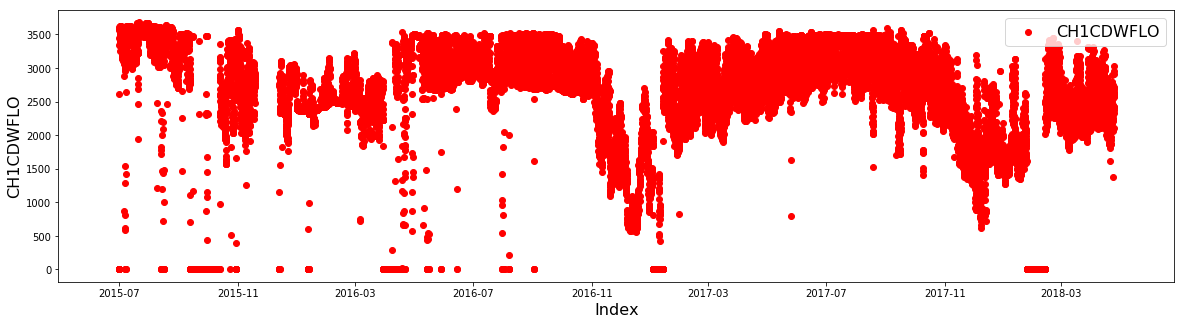

Is there any data that should be excluded from the model training data? (y/n): n
Input the start date of training data: 2016-08-01
Input the end date of training data: 2016-08-31
Input the start date of validation data: 2016-09-01
Input the end date of validation data: 2016-09-30


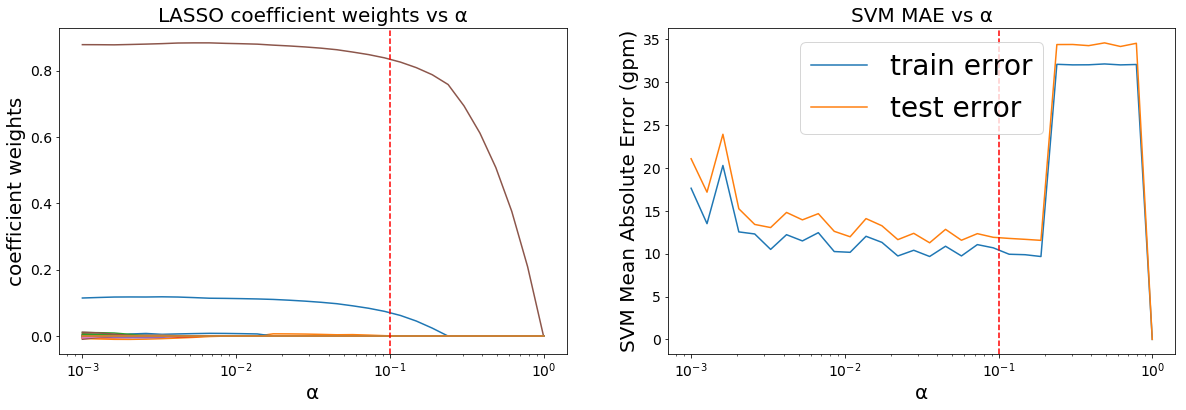

The features at the selected alpha are: Index(['CDWP1SPD', 'CH1FLA', 'CDWP1kW'], dtype='object')
Would you like to attempt another alpha? (y/n): n
These are the features that LASSO selected: ['CDWP1SPD', 'CH1FLA', 'CDWP1kW']
Would you like to change the features? (y/n): n
Here is the final feature set: ['CDWP1SPD', 'CH1FLA', 'CDWP1kW']
Input the model name to save this as (example.sav): kfdjskjfds.sav
the model score is: 0.9969152095377795
the mean absolute error is: 10.195919001273644
Please input the allowable error in this sensor (|predicted - actual|): 250


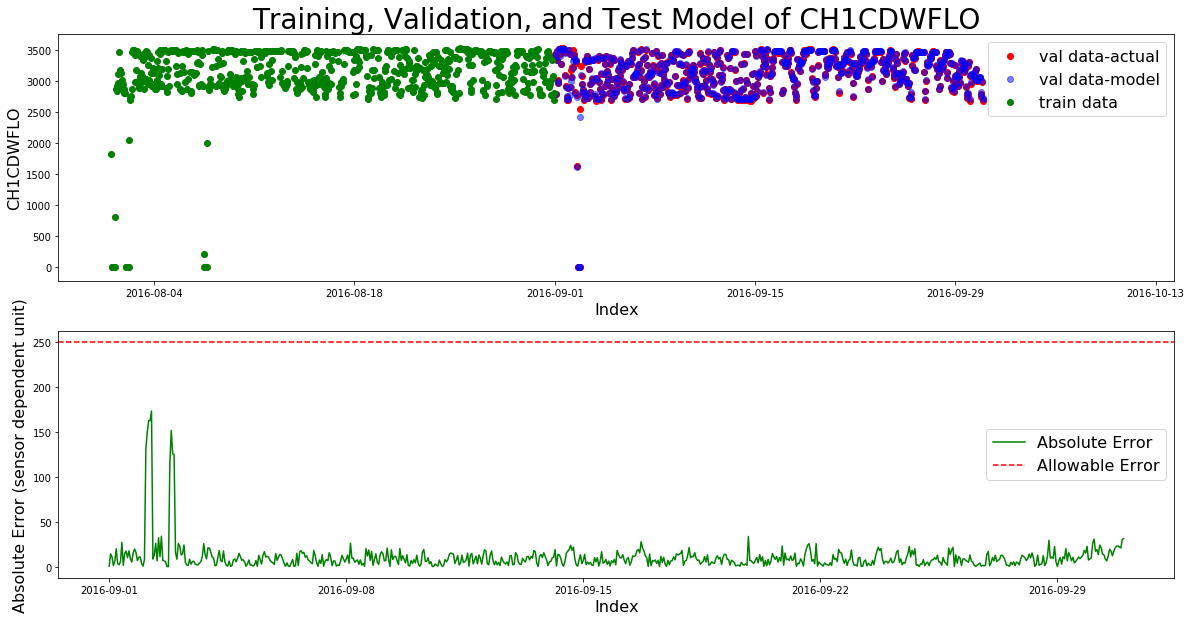

Would you like to test the model on the month subsequent to the validation data? If that data is not available in the folder, answer "n" (y/n): y


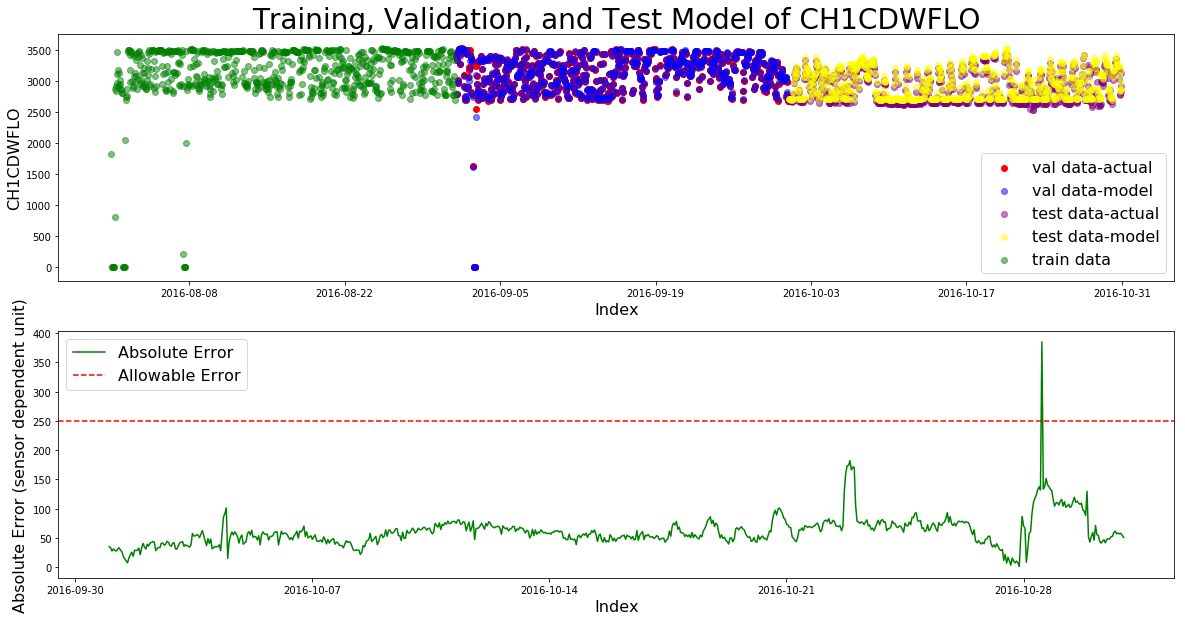

Would you like to remove the out-of-calibration data from the training set, re-train, and predict the following month? (y/n):y


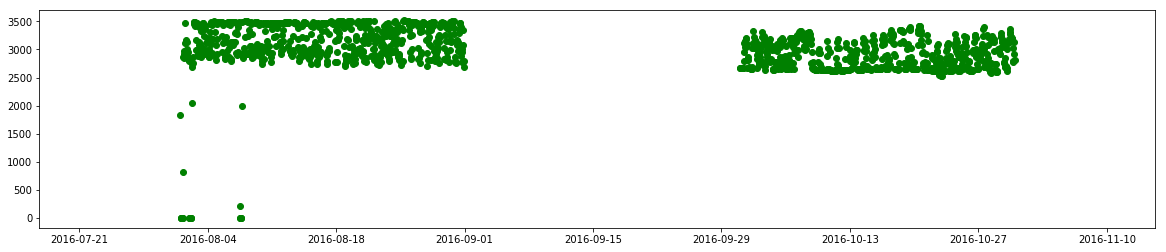

Is there a date range you would like to add back in? (y/n): n


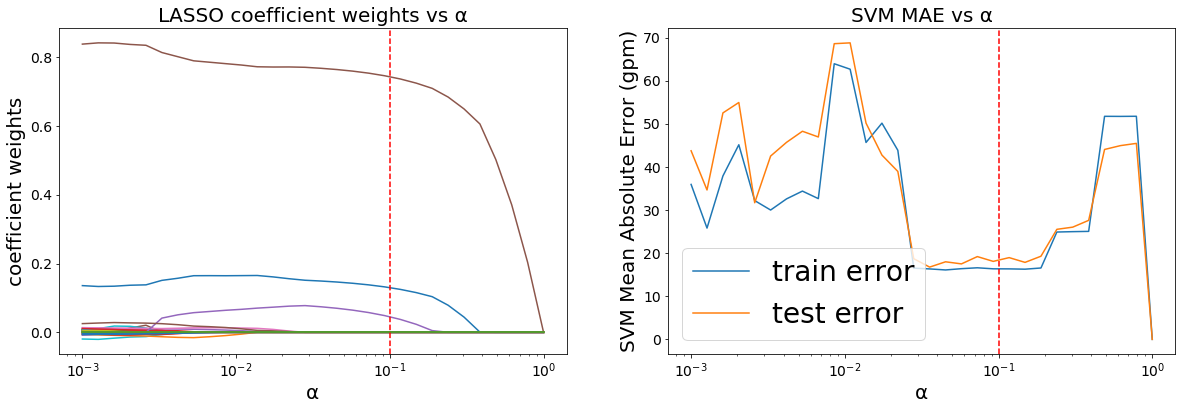

The features at the selected alpha are: Index(['CDWP1SPD', 'CDWP1kW', 'CH1DPLift'], dtype='object')
Would you like to attempt another alpha? (y/n): n
These are the features that LASSO selected: ['CDWP1SPD', 'CDWP1kW', 'CH1DPLift']
Would you like to change the features? (y/n): n
Here is the final feature set: ['CDWP1SPD', 'CDWP1kW', 'CH1DPLift']
Input the model name to save this as (example.sav): kdjflkdsjf.sav
the model score is: 0.9951214089093782
the mean absolute error is: 13.749007819522737


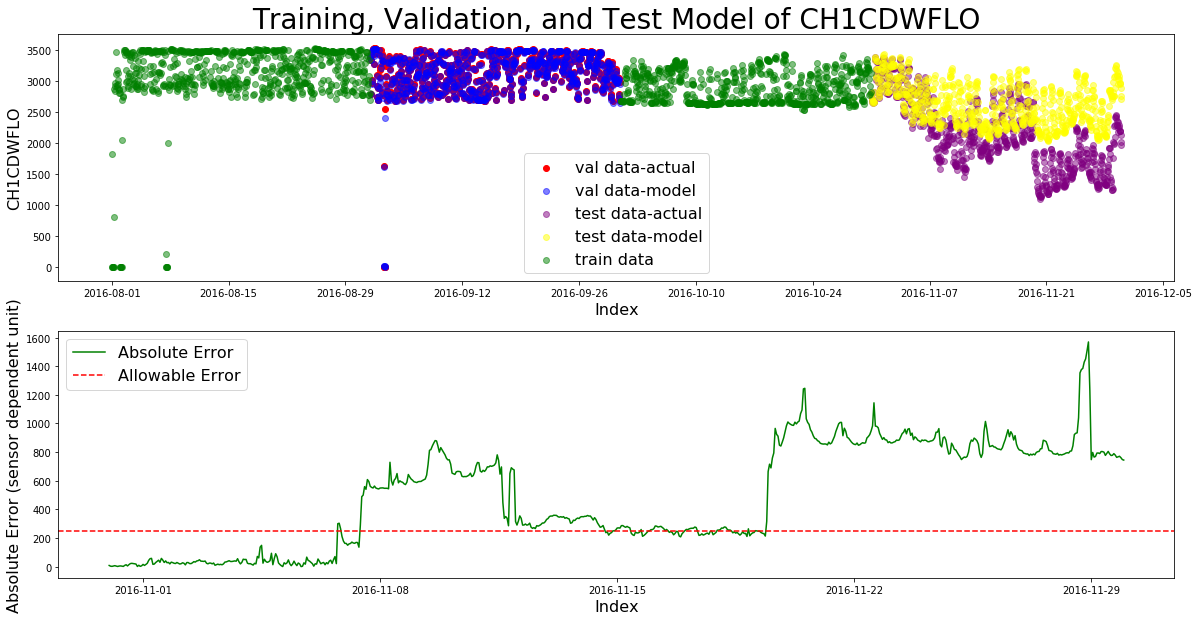

Would you like to repeat? (y/n):y


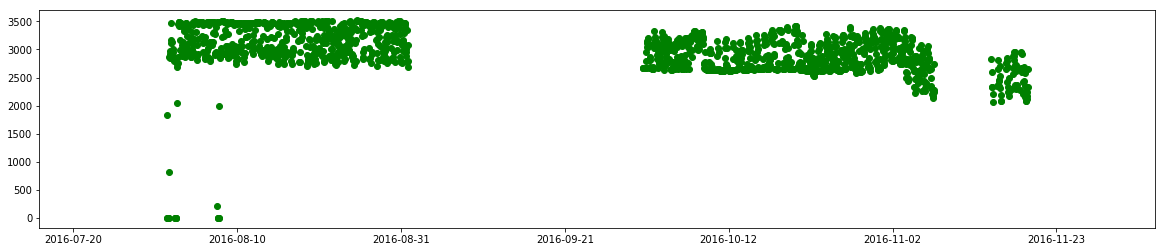

Is there a date range you would like to add back in? (y/n): n


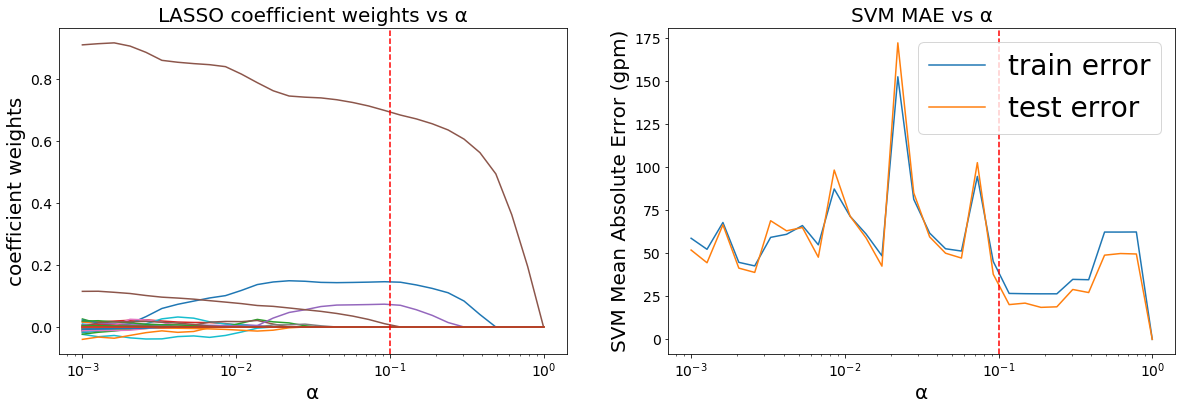

The features at the selected alpha are: Index(['CDWP1SPD', 'CDWP1kW', 'CH1DPLift', 'CH2CDWFLO'], dtype='object')
Would you like to attempt another alpha? (y/n): n
These are the features that LASSO selected: ['CDWP1SPD', 'CDWP1kW', 'CH1DPLift', 'CH2CDWFLO']
Would you like to change the features? (y/n): n
Here is the final feature set: ['CDWP1SPD', 'CDWP1kW', 'CH1DPLift', 'CH2CDWFLO']
Input the model name to save this as (example.sav): something.sav
the model score is: 0.9826382144709328
the mean absolute error is: 24.533671762348213


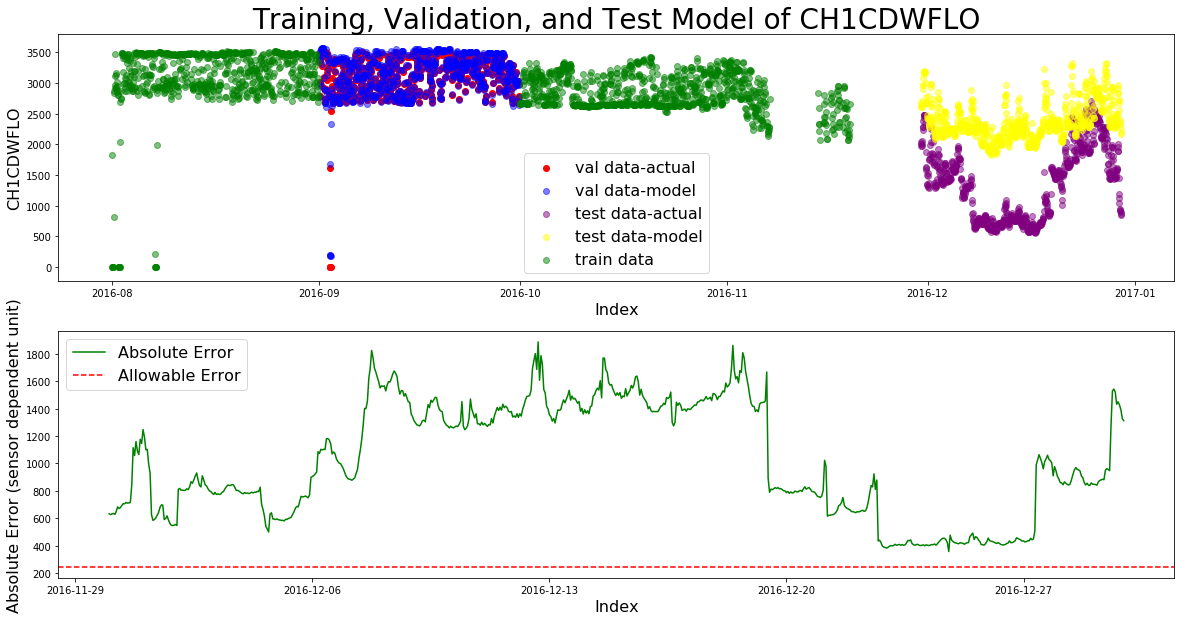

Would you like to repeat? (y/n):n
Would you like to see another set of training/validation/testing data? (y/n): n


()

In [3]:
bsf.drift_finder()

Please input the sensor to build a model for (must match column name exactly): CH1CDWFLO
Please review the loaded data, take note if there are date ranges to be excluded.


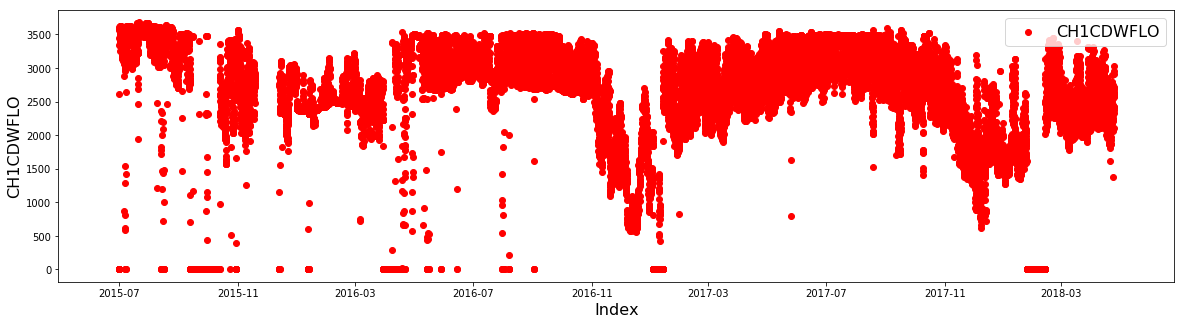

Is there any data that should be excluded from the model training data? (y/n): n
Input the start date of training data: 2016-08-01
Input the end date of training data: 2016-08-30
Input the start date of validation data: 2016-09-01
Input the end date of validation data: 2016-09-30


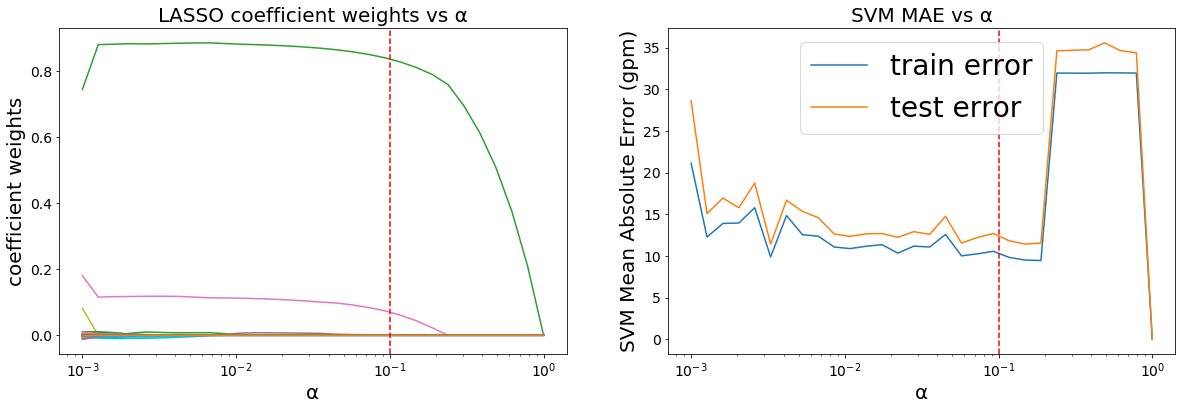

The features at the selected alpha are: Index(['CDWP1SPD', 'CDWP1kW'], dtype='object')
Would you like to attempt another alpha? (y/n): n
These are the features that LASSO selected: ['CDWP1SPD', 'CDWP1kW']
Would you like to change the features? (y/n): n
Here is the final feature set: ['CDWP1SPD', 'CDWP1kW']
Input the model name to save this as (example.sav): fjdslkfjs.sav
the model score is: 0.9965825277270663
the mean absolute error is: 12.244142301782787
Please input the allowable error in this sensor (|predicted - actual|): 200


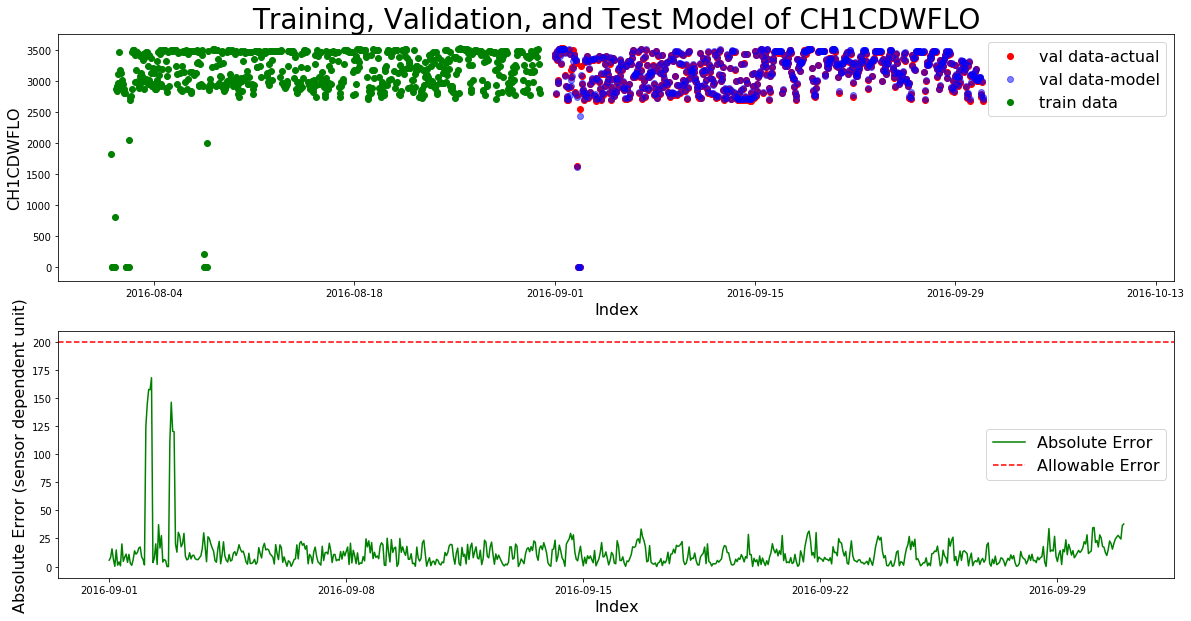

Would you like to test the model on the month subsequent to the validation data? If that data is not available in the folder, answer "n" (y/n): y


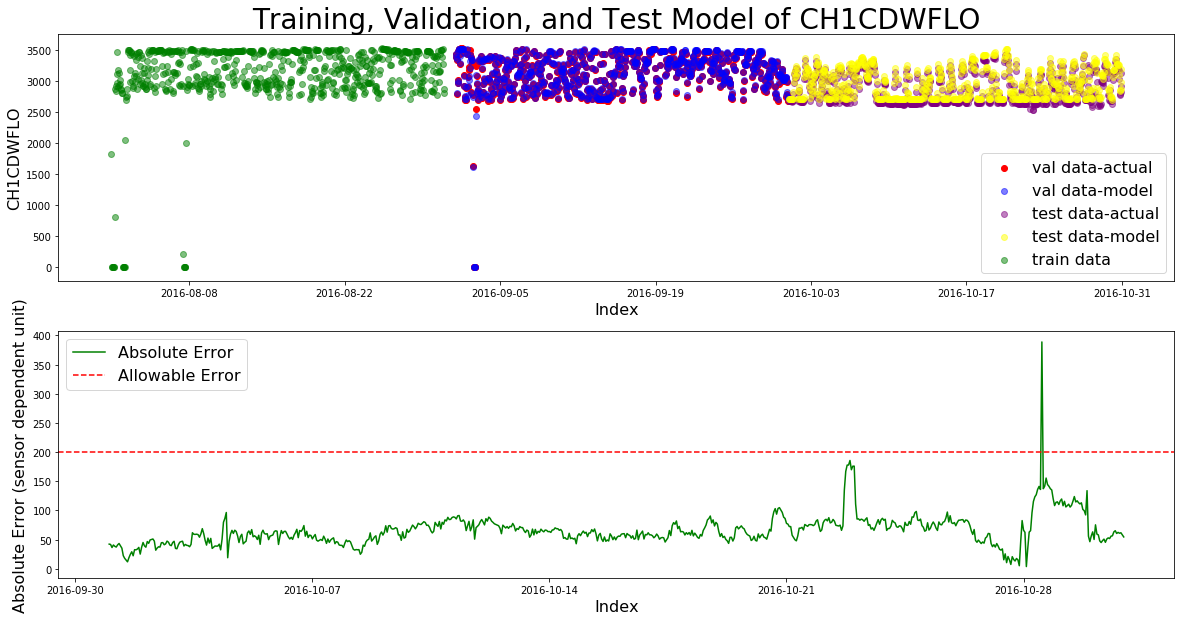

Would you like to remove the out-of-calibration data from the training set, re-train, and predict the following month? (y/n):y


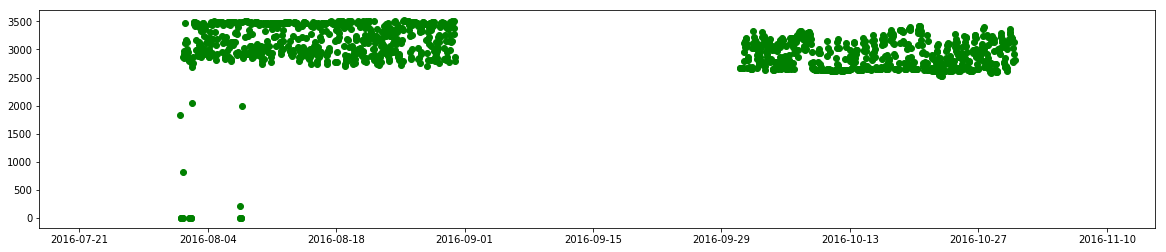

Is there a date range you would like to add back in? (y/n): n


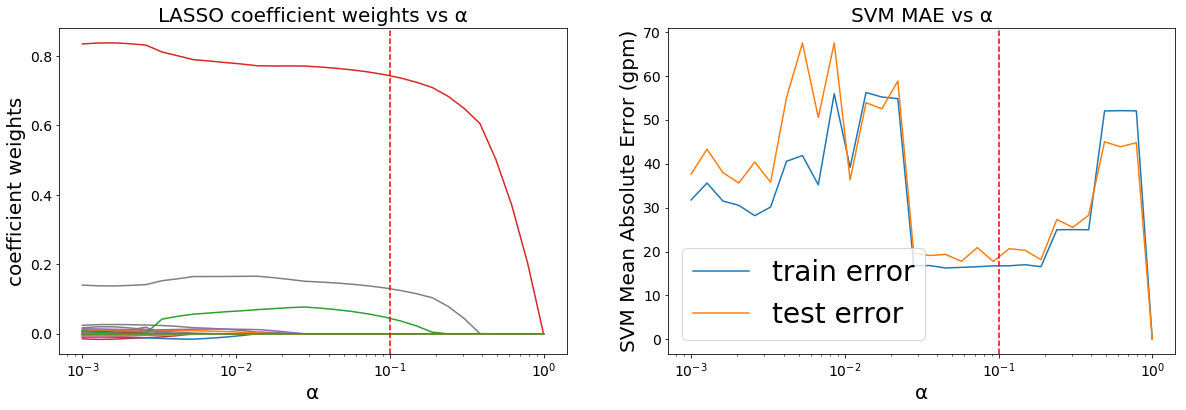

The features at the selected alpha are: Index(['CDWP1SPD', 'CDWP1kW', 'CH1DPLift'], dtype='object')
Would you like to attempt another alpha? (y/n): n
These are the features that LASSO selected: ['CDWP1SPD', 'CDWP1kW', 'CH1DPLift']
Would you like to change the features? (y/n): n
Here is the final feature set: ['CDWP1SPD', 'CDWP1kW', 'CH1DPLift']
Input the model name to save this as (example.sav): kdfjsjkl.sv
the model score is: 0.9952062560537515
the mean absolute error is: 13.524884221779256


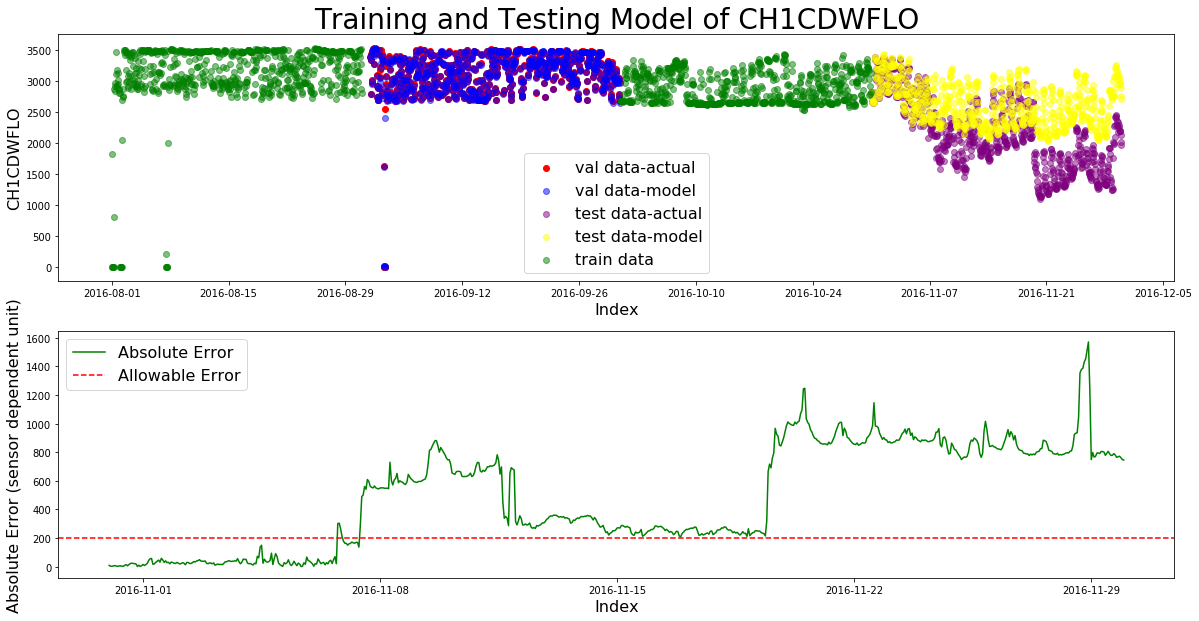

Would you like to repeat? (y/n):n
Would you like to see another set of training/validation/testing data? (y/n): n


()

In [3]:
bsf.drift_finder()